In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [21]:
import seaborn as sns
import seaborn.objects as so
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

from eppy.bunch_subclass import EpBunch

from helpers.ep_helpers import PARTNER
from helpers.variable_interfaces import all_variables as vars
from setup.materials_setup import retrieve_cases
from setup.data_wrangle2 import *
from analysis.helpers import map_zone_names, extract_times
from analysis.plot_helpers import set_axis_ticks
# from analysis.dataframes import *
# from analysis.volumes import *

from analysis.plot_subsurfaces import *
from analysis.plot_helpers import plot_zone_domains

sns.set_style("darkgrid")
from datetime import datetime

from experiments.retrieve import retrieve_comparison_groups
from analysis.pressure_on_network import create_network_plot

In [ ]:



cases = retrieve_comparison_groups("windows")
cases

In [11]:
cases

[CaseData(case_name='Light_case_amb_b1', idf=<geomeppy.idf.IDF object at 0x107acb5e0>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Light_case_amb_b1/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_amb_b1'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Light_case_amb_b1')),
 CaseData(case_name='Light_case_bol_5', idf=<geomeppy.idf.IDF object at 0x171c381c0>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Light_case_bol_5/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_bol_5'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Light_case_bol_5')),
 CaseData(case_name='Light_case_red_b1', idf=<geomeppy.idf.IDF object at 0x168eb3d60>, sql=Ene

In [60]:
medium_cases = [i for i in cases if "Medium" in i.case_name]
[case] = [i for i in medium_cases if "amb" in i.case_name]
case

CaseData(case_name='Medium_case_amb_b1', idf=<geomeppy.idf.IDF object at 0x16935f8e0>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Medium_case_amb_b1/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_amb_b1'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Medium_case_amb_b1'))

Block 09 Storey 0 Wall 0001_1 Door NOT IN AFN.. 
Block 010 Storey 0 Wall 0001_1 Door NOT IN AFN.. 
Block 05 Storey 0 Wall 0001_1 Door NOT IN AFN.. 
Block 04 Storey 0 Wall 0002_1 Door NOT IN AFN.. 


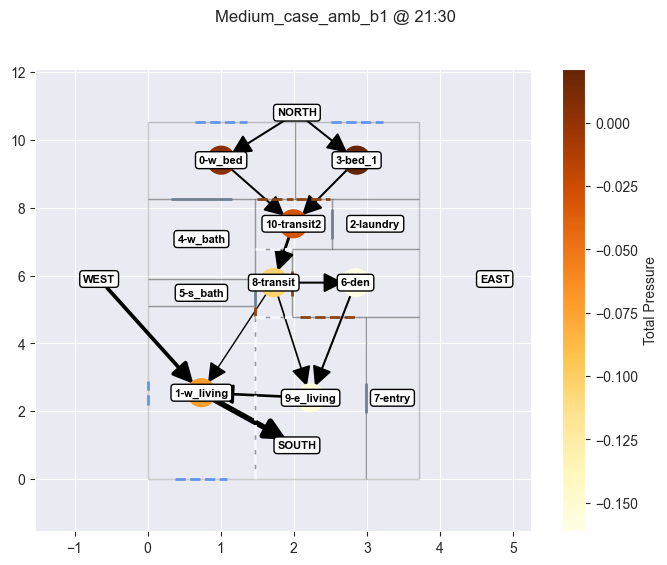

In [63]:
create_network_plot(case, (21,30));

Block 06 Storey 0 Wall 0002_1 Door NOT IN AFN.. 


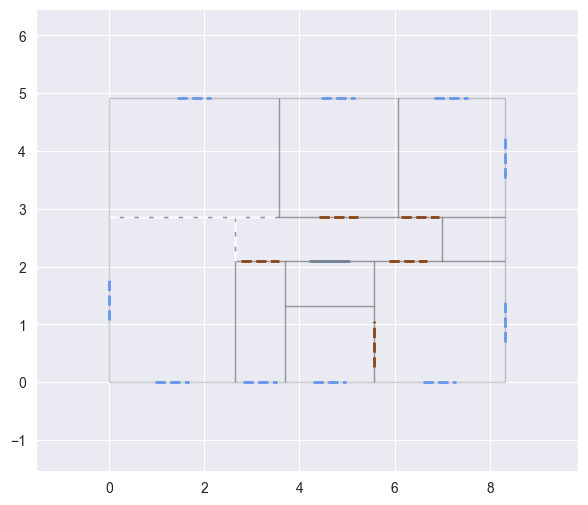

In [20]:
time = datetime(2017, 7, 1, 12, 0)
fig, ax = plt.subplots(nrows=1, figsize=(7, 6))
ax = plot_zone_domains(case.idf, ax)
ax, data = plot_surfaces(case, time, ax)


In [19]:
df = create_dataframe_for_case(case, vars.afn.surface["opening_factor"])
df["space_names"].unique().to_list()

['BLOCK 08 STOREY 0 WALL 0002_2 DOOR',
 'BLOCK 05 STOREY 0 WALL 0002_1 DOOR',
 'BLOCK 01 STOREY 0 WALL 0002 WINDOW',
 'BLOCK 04 STOREY 0 WALL 0004 WINDOW',
 'BLOCK 09 STOREY 0 WALL 0004 WINDOW',
 'BLOCK 05 STOREY 0 WALL 0004 WINDOW',
 'BLOCK 08 STOREY 0 WALL 0002_3 DOOR',
 'BLOCK 04 STOREY 0 WALL 0001_1 DOOR',
 'BLOCK 02 STOREY 0 WALL 0001 WINDOW',
 'BLOCK 08 STOREY 0 WALL 0002_1',
 'BLOCK 09 STOREY 0 WALL 0003 WINDOW',
 'BLOCK 02 STOREY 0 WALL 0002 WINDOW',
 'BLOCK 03 STOREY 0 WALL 0001 WINDOW',
 'BLOCK 00 STOREY 0 WALL 0002 WINDOW',
 'BLOCK 09 STOREY 0 WALL 0001_2',
 'BLOCK 09 STOREY 0 WALL 0002_1',
 'BLOCK 03 STOREY 0 WALL 0002_2 DOOR',
 'BLOCK 03 STOREY 0 WALL 0004 WINDOW']

In [14]:
get_opening_statuses(case, time)

{'BLOCK 08 STOREY 0 WALL 0002_2 DOOR': 1.0,
 'BLOCK 03 STOREY 0 WALL 0004 WINDOW': 1.0,
 'BLOCK 05 STOREY 0 WALL 0002_1 DOOR': 1.0,
 'BLOCK 04 STOREY 0 WALL 0001_1 DOOR': 1.0,
 'BLOCK 05 STOREY 0 WALL 0004 WINDOW': 1.0,
 'BLOCK 08 STOREY 0 WALL 0002_3 DOOR': 1.0,
 'BLOCK 09 STOREY 0 WALL 0003 WINDOW': 1.0,
 'BLOCK 09 STOREY 0 WALL 0004 WINDOW': 1.0,
 'BLOCK 02 STOREY 0 WALL 0002 WINDOW': 1.0,
 'BLOCK 01 STOREY 0 WALL 0002 WINDOW': 1.0,
 'BLOCK 03 STOREY 0 WALL 0001 WINDOW': 1.0,
 'BLOCK 04 STOREY 0 WALL 0004 WINDOW': 1.0,
 'BLOCK 02 STOREY 0 WALL 0001 WINDOW': 1.0,
 'BLOCK 03 STOREY 0 WALL 0002_2 DOOR': 1.0,
 'BLOCK 00 STOREY 0 WALL 0002 WINDOW': 1.0}

In [ ]:
# airboundaries do have opening surfaces.. 